<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

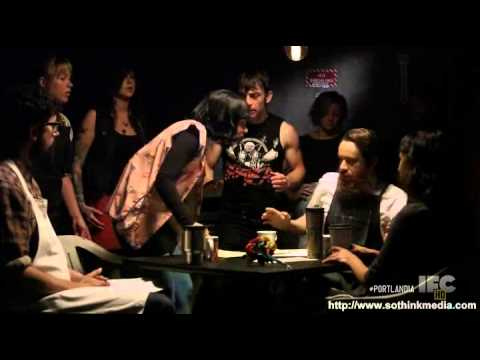

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
# Imports
import pandas as pd

import re
import squarify
import matplotlib.pyplot as plt

from collections import Counter

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [3]:
# Current working directory
%pwd

'/Users/JKMacBook/Documents/Lambda/NLP/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
# Load the data
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Clean full_review_text - remove date, check-in, keep on letters and numbers, convert to lowercase
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# Convert star_rating to integer
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [6]:
shops.describe()

,star_rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'austin', 'come', 'definitely', 'order',
                                            'spot', 'ordered'])

In [8]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, date, night, ambiance, beautiful, love,...
2    [list, brunch, love, eclectic, homey, plush, d...
3    [cool, decor, good, drink, nice, seat, overpri...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [9]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [10]:
# Create a word count dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
136,good,3438,5367,1.0,0.016460,0.016460,0.451418
102,great,2844,3930,2.0,0.012053,0.028512,0.373424
145,like,2266,3361,3.0,0.010308,0.038820,0.297532
451,time,1752,2379,4.0,0.007296,0.046116,0.230042
29,drink,1650,2374,5.0,0.007281,0.053396,0.216649


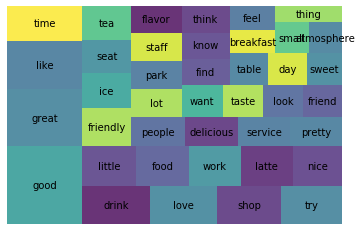

In [11]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [13]:
# Check top words for 4 and 5 ratings
shops_45 = shops[shops['star_rating'] >= 4]
good_count = count(shops_45['tokens'])
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
163,good,2726,4230,1.0,0.016659,0.016659,0.443974
102,great,2496,3461,2.0,0.013630,0.030289,0.406515
177,like,1672,2420,3.0,0.009530,0.039819,0.272313
6,love,1604,2117,4.0,0.008337,0.048156,0.261238
1,shop,1349,1813,5.0,0.007140,0.055296,0.219707
359,time,1331,1766,6.0,0.006955,0.062251,0.216775
29,drink,1285,1761,7.0,0.006935,0.069186,0.209283
61,try,1327,1704,8.0,0.006711,0.075897,0.216124
175,little,1250,1554,9.0,0.006120,0.082017,0.203583
17,latte,1031,1538,10.0,0.006057,0.088074,0.167915


In [14]:
# Check top words for 1 thru 3 ratings
shops_13 = shops[shops['star_rating'] <= 3]
bad_count = count(shops_13['tokens'])
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
10,good,712,1137,1.0,0.015759,0.015759,0.482385
20,like,594,941,2.0,0.013043,0.028802,0.402439
28,drink,365,613,3.0,0.008496,0.037298,0.247290
201,time,421,613,4.0,0.008496,0.045795,0.285230
145,food,316,494,5.0,0.006847,0.052642,0.214092
102,great,348,469,6.0,0.006501,0.059142,0.235772
4,service,346,447,7.0,0.006196,0.065338,0.234417
149,shop,315,433,8.0,0.006002,0.071339,0.213415
60,try,338,427,9.0,0.005918,0.077258,0.228997
55,little,312,408,10.0,0.005655,0.082913,0.211382


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [15]:
def bad_counter(w):
    if w in bad_count['word'].values:
      bad_pct = bad_count.loc[bad_count['word'] == w, 'appears_in_pct'].item()
    else:
      bad_pct = 0
    
    return bad_pct

good_count['bad_appears_in_pct'] = good_count.apply(lambda x: bad_counter(x['word']), axis=1)

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct
163,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385
102,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772
177,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439
6,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954
1,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415
359,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230
29,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290
61,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997
175,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382
17,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827


In [16]:
good_count['appears_in_diff'] = good_count['appears_in_pct'] - good_count['bad_appears_in_pct']

good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
163,good,2726,4230,1.0,0.016659,0.016659,0.443974,0.482385,-0.038411
102,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
177,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
6,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
1,shop,1349,1813,5.0,0.007140,0.055296,0.219707,0.213415,0.006292
359,time,1331,1766,6.0,0.006955,0.062251,0.216775,0.285230,-0.068455
29,drink,1285,1761,7.0,0.006935,0.069186,0.209283,0.247290,-0.038007
61,try,1327,1704,8.0,0.006711,0.075897,0.216124,0.228997,-0.012874
175,little,1250,1554,9.0,0.006120,0.082017,0.203583,0.211382,-0.007799
17,latte,1031,1538,10.0,0.006057,0.088074,0.167915,0.155827,0.012089


In [17]:
good_count.sort_values(by=['appears_in_diff'], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
102,great,2496,3461,2.0,0.013630,0.030289,0.406515,0.235772,0.170742
553,delicious,1178,1314,15.0,0.005175,0.116142,0.191857,0.056233,0.135624
6,love,1604,2117,4.0,0.008337,0.048156,0.261238,0.142954,0.118284
130,friendly,1420,1487,12.0,0.005856,0.099790,0.231270,0.122629,0.108642
565,amaze,695,798,38.0,0.003143,0.203719,0.113192,0.031165,0.082027
188,perfect,623,699,47.0,0.002753,0.229865,0.101466,0.026423,0.075043
310,favorite,660,775,39.0,0.003052,0.206771,0.107492,0.034553,0.072939
484,awesome,556,619,61.0,0.002438,0.266116,0.090554,0.029133,0.061421
181,super,674,773,40.0,0.003044,0.209816,0.109772,0.066396,0.043376
410,recommend,598,630,59.0,0.002481,0.261241,0.097394,0.054878,0.042516


In [18]:
good_count.sort_values(by=['appears_in_diff'])[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,bad_appears_in_pct,appears_in_diff
177,like,1672,2420,3.0,0.009530,0.039819,0.272313,0.402439,-0.130126
510,okay,202,214,250.0,0.000843,0.524954,0.032899,0.144986,-0.112087
863,ask,310,345,135.0,0.001359,0.404371,0.050489,0.149051,-0.098563
277,service,861,933,26.0,0.003674,0.163384,0.140228,0.234417,-0.094189
419,taste,678,814,36.0,0.003206,0.197398,0.110423,0.192412,-0.081988
182,didnt,435,496,95.0,0.001953,0.339997,0.070847,0.151762,-0.080915
893,customer,273,307,160.0,0.001209,0.436459,0.044463,0.125339,-0.080876
74,wasnt,261,301,162.0,0.001185,0.438834,0.042508,0.116531,-0.074023
490,review,477,531,82.0,0.002091,0.313851,0.077687,0.151084,-0.073397
120,maybe,186,207,257.0,0.000815,0.530708,0.030293,0.103659,-0.073365


#### Analysis

It is clear from the data that shops with ratings of 4 and 5 have reviews that mention the following words more often than shops with rating of 1, 2 and 3:

great, delicious, love, friendly, amaze, perfect, favorite, awesome, super and recommend.

The chart directly above shows that these 10 words have the greatest relative difference (appears_in_diff) between the good and the bad shops.  The result is calculated by counting the reviews in which the word appears in (appears_in) for good and bad shops, calculating the percent of the total reviews (appears_in_pct) for good shops, calculating the percent of total reviews in bad shops (bad_appears_in_pct), calculating the difference between the good and the bad shops (appears_in_diff).

For shops with ratings of 1, 2 and 3 words such as the following list dominated:

like, okay, ask, service, taste, didnt, customer, wasnt, review and maybe 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

